# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

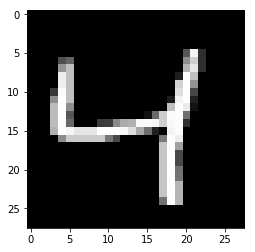

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [13]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 64 # feel free to change this value

image_size = mnist.train.images.shape[1]

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, (None, image_size))
targets_ = tf.placeholder(tf.float32, (None, image_size))

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits)

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [10]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [14]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6942
Epoch: 1/20... Training loss: 0.6885
Epoch: 1/20... Training loss: 0.6826
Epoch: 1/20... Training loss: 0.6751
Epoch: 1/20... Training loss: 0.6666
Epoch: 1/20... Training loss: 0.6561
Epoch: 1/20... Training loss: 0.6428
Epoch: 1/20... Training loss: 0.6311
Epoch: 1/20... Training loss: 0.6120
Epoch: 1/20... Training loss: 0.5940
Epoch: 1/20... Training loss: 0.5720
Epoch: 1/20... Training loss: 0.5537
Epoch: 1/20... Training loss: 0.5281
Epoch: 1/20... Training loss: 0.5032
Epoch: 1/20... Training loss: 0.4843
Epoch: 1/20... Training loss: 0.4586
Epoch: 1/20... Training loss: 0.4367
Epoch: 1/20... Training loss: 0.4161
Epoch: 1/20... Training loss: 0.3953
Epoch: 1/20... Training loss: 0.3814
Epoch: 1/20... Training loss: 0.3697
Epoch: 1/20... Training loss: 0.3505
Epoch: 1/20... Training loss: 0.3418
Epoch: 1/20... Training loss: 0.3333
Epoch: 1/20... Training loss: 0.3195
Epoch: 1/20... Training loss: 0.3148
Epoch: 1/20... Training loss: 0.3033
E

Epoch: 1/20... Training loss: 0.1672
Epoch: 1/20... Training loss: 0.1690
Epoch: 1/20... Training loss: 0.1628
Epoch: 1/20... Training loss: 0.1645
Epoch: 1/20... Training loss: 0.1668
Epoch: 1/20... Training loss: 0.1703
Epoch: 1/20... Training loss: 0.1604
Epoch: 1/20... Training loss: 0.1638
Epoch: 1/20... Training loss: 0.1658
Epoch: 1/20... Training loss: 0.1643
Epoch: 1/20... Training loss: 0.1672
Epoch: 1/20... Training loss: 0.1637
Epoch: 1/20... Training loss: 0.1675
Epoch: 1/20... Training loss: 0.1652
Epoch: 1/20... Training loss: 0.1597
Epoch: 1/20... Training loss: 0.1630
Epoch: 1/20... Training loss: 0.1655
Epoch: 1/20... Training loss: 0.1620
Epoch: 1/20... Training loss: 0.1635
Epoch: 1/20... Training loss: 0.1624
Epoch: 1/20... Training loss: 0.1634
Epoch: 1/20... Training loss: 0.1598
Epoch: 1/20... Training loss: 0.1553
Epoch: 1/20... Training loss: 0.1604
Epoch: 1/20... Training loss: 0.1678
Epoch: 1/20... Training loss: 0.1645
Epoch: 1/20... Training loss: 0.1588
E

Epoch: 2/20... Training loss: 0.1360
Epoch: 2/20... Training loss: 0.1298
Epoch: 2/20... Training loss: 0.1280
Epoch: 2/20... Training loss: 0.1346
Epoch: 2/20... Training loss: 0.1319
Epoch: 2/20... Training loss: 0.1287
Epoch: 2/20... Training loss: 0.1360
Epoch: 2/20... Training loss: 0.1312
Epoch: 2/20... Training loss: 0.1273
Epoch: 2/20... Training loss: 0.1239
Epoch: 2/20... Training loss: 0.1302
Epoch: 2/20... Training loss: 0.1276
Epoch: 2/20... Training loss: 0.1329
Epoch: 2/20... Training loss: 0.1337
Epoch: 2/20... Training loss: 0.1287
Epoch: 2/20... Training loss: 0.1308
Epoch: 2/20... Training loss: 0.1264
Epoch: 2/20... Training loss: 0.1278
Epoch: 2/20... Training loss: 0.1290
Epoch: 2/20... Training loss: 0.1309
Epoch: 2/20... Training loss: 0.1287
Epoch: 2/20... Training loss: 0.1320
Epoch: 2/20... Training loss: 0.1262
Epoch: 2/20... Training loss: 0.1277
Epoch: 2/20... Training loss: 0.1280
Epoch: 2/20... Training loss: 0.1284
Epoch: 2/20... Training loss: 0.1281
E

Epoch: 3/20... Training loss: 0.1091
Epoch: 3/20... Training loss: 0.1107
Epoch: 3/20... Training loss: 0.1110
Epoch: 3/20... Training loss: 0.1090
Epoch: 3/20... Training loss: 0.1152
Epoch: 3/20... Training loss: 0.1127
Epoch: 3/20... Training loss: 0.1103
Epoch: 3/20... Training loss: 0.1086
Epoch: 3/20... Training loss: 0.1175
Epoch: 3/20... Training loss: 0.1113
Epoch: 3/20... Training loss: 0.1142
Epoch: 3/20... Training loss: 0.1127
Epoch: 3/20... Training loss: 0.1133
Epoch: 3/20... Training loss: 0.1106
Epoch: 3/20... Training loss: 0.1112
Epoch: 3/20... Training loss: 0.1108
Epoch: 3/20... Training loss: 0.1092
Epoch: 3/20... Training loss: 0.1099
Epoch: 3/20... Training loss: 0.1121
Epoch: 3/20... Training loss: 0.1069
Epoch: 3/20... Training loss: 0.1089
Epoch: 3/20... Training loss: 0.1103
Epoch: 3/20... Training loss: 0.1085
Epoch: 3/20... Training loss: 0.1097
Epoch: 3/20... Training loss: 0.1084
Epoch: 3/20... Training loss: 0.1161
Epoch: 3/20... Training loss: 0.1100
E

Epoch: 4/20... Training loss: 0.1016
Epoch: 4/20... Training loss: 0.1002
Epoch: 4/20... Training loss: 0.1039
Epoch: 4/20... Training loss: 0.0987
Epoch: 4/20... Training loss: 0.0994
Epoch: 4/20... Training loss: 0.0950
Epoch: 4/20... Training loss: 0.0982
Epoch: 4/20... Training loss: 0.1023
Epoch: 4/20... Training loss: 0.0990
Epoch: 4/20... Training loss: 0.0995
Epoch: 4/20... Training loss: 0.0983
Epoch: 4/20... Training loss: 0.0968
Epoch: 4/20... Training loss: 0.1016
Epoch: 4/20... Training loss: 0.0968
Epoch: 4/20... Training loss: 0.1029
Epoch: 4/20... Training loss: 0.1000
Epoch: 4/20... Training loss: 0.0988
Epoch: 4/20... Training loss: 0.0966
Epoch: 4/20... Training loss: 0.0988
Epoch: 4/20... Training loss: 0.0998
Epoch: 4/20... Training loss: 0.1003
Epoch: 4/20... Training loss: 0.0979
Epoch: 4/20... Training loss: 0.0995
Epoch: 4/20... Training loss: 0.0994
Epoch: 4/20... Training loss: 0.1017
Epoch: 4/20... Training loss: 0.1035
Epoch: 4/20... Training loss: 0.0998
E

Epoch: 5/20... Training loss: 0.0928
Epoch: 5/20... Training loss: 0.0894
Epoch: 5/20... Training loss: 0.0934
Epoch: 5/20... Training loss: 0.0927
Epoch: 5/20... Training loss: 0.0932
Epoch: 5/20... Training loss: 0.0885
Epoch: 5/20... Training loss: 0.0956
Epoch: 5/20... Training loss: 0.0934
Epoch: 5/20... Training loss: 0.0938
Epoch: 5/20... Training loss: 0.0930
Epoch: 5/20... Training loss: 0.0936
Epoch: 5/20... Training loss: 0.0900
Epoch: 5/20... Training loss: 0.0904
Epoch: 5/20... Training loss: 0.0933
Epoch: 5/20... Training loss: 0.0899
Epoch: 5/20... Training loss: 0.0904
Epoch: 5/20... Training loss: 0.0893
Epoch: 5/20... Training loss: 0.0924
Epoch: 5/20... Training loss: 0.0921
Epoch: 5/20... Training loss: 0.0914
Epoch: 5/20... Training loss: 0.0881
Epoch: 5/20... Training loss: 0.0899
Epoch: 5/20... Training loss: 0.0922
Epoch: 5/20... Training loss: 0.0922
Epoch: 5/20... Training loss: 0.0890
Epoch: 5/20... Training loss: 0.0947
Epoch: 5/20... Training loss: 0.0903
E

Epoch: 5/20... Training loss: 0.0863
Epoch: 5/20... Training loss: 0.0872
Epoch: 5/20... Training loss: 0.0865
Epoch: 5/20... Training loss: 0.0859
Epoch: 5/20... Training loss: 0.0873
Epoch: 5/20... Training loss: 0.0877
Epoch: 5/20... Training loss: 0.0869
Epoch: 5/20... Training loss: 0.0845
Epoch: 5/20... Training loss: 0.0868
Epoch: 5/20... Training loss: 0.0824
Epoch: 5/20... Training loss: 0.0893
Epoch: 5/20... Training loss: 0.0850
Epoch: 5/20... Training loss: 0.0863
Epoch: 5/20... Training loss: 0.0886
Epoch: 5/20... Training loss: 0.0849
Epoch: 5/20... Training loss: 0.0873
Epoch: 5/20... Training loss: 0.0898
Epoch: 5/20... Training loss: 0.0890
Epoch: 5/20... Training loss: 0.0846
Epoch: 5/20... Training loss: 0.0870
Epoch: 5/20... Training loss: 0.0849
Epoch: 5/20... Training loss: 0.0862
Epoch: 5/20... Training loss: 0.0854
Epoch: 5/20... Training loss: 0.0848
Epoch: 5/20... Training loss: 0.0864
Epoch: 5/20... Training loss: 0.0861
Epoch: 5/20... Training loss: 0.0875
E

Epoch: 6/20... Training loss: 0.0828
Epoch: 6/20... Training loss: 0.0820
Epoch: 6/20... Training loss: 0.0826
Epoch: 6/20... Training loss: 0.0845
Epoch: 6/20... Training loss: 0.0835
Epoch: 6/20... Training loss: 0.0827
Epoch: 6/20... Training loss: 0.0827
Epoch: 6/20... Training loss: 0.0817
Epoch: 6/20... Training loss: 0.0852
Epoch: 6/20... Training loss: 0.0843
Epoch: 6/20... Training loss: 0.0832
Epoch: 6/20... Training loss: 0.0818
Epoch: 6/20... Training loss: 0.0839
Epoch: 6/20... Training loss: 0.0798
Epoch: 6/20... Training loss: 0.0837
Epoch: 6/20... Training loss: 0.0807
Epoch: 6/20... Training loss: 0.0848
Epoch: 6/20... Training loss: 0.0845
Epoch: 6/20... Training loss: 0.0823
Epoch: 6/20... Training loss: 0.0825
Epoch: 6/20... Training loss: 0.0832
Epoch: 6/20... Training loss: 0.0820
Epoch: 6/20... Training loss: 0.0812
Epoch: 6/20... Training loss: 0.0820
Epoch: 6/20... Training loss: 0.0837
Epoch: 6/20... Training loss: 0.0858
Epoch: 6/20... Training loss: 0.0830
E

Epoch: 7/20... Training loss: 0.0781
Epoch: 7/20... Training loss: 0.0812
Epoch: 7/20... Training loss: 0.0790
Epoch: 7/20... Training loss: 0.0795
Epoch: 7/20... Training loss: 0.0769
Epoch: 7/20... Training loss: 0.0787
Epoch: 7/20... Training loss: 0.0807
Epoch: 7/20... Training loss: 0.0768
Epoch: 7/20... Training loss: 0.0793
Epoch: 7/20... Training loss: 0.0804
Epoch: 7/20... Training loss: 0.0782
Epoch: 7/20... Training loss: 0.0804
Epoch: 7/20... Training loss: 0.0782
Epoch: 7/20... Training loss: 0.0802
Epoch: 7/20... Training loss: 0.0816
Epoch: 7/20... Training loss: 0.0801
Epoch: 7/20... Training loss: 0.0817
Epoch: 7/20... Training loss: 0.0778
Epoch: 7/20... Training loss: 0.0774
Epoch: 7/20... Training loss: 0.0773
Epoch: 7/20... Training loss: 0.0801
Epoch: 7/20... Training loss: 0.0818
Epoch: 7/20... Training loss: 0.0789
Epoch: 7/20... Training loss: 0.0801
Epoch: 7/20... Training loss: 0.0777
Epoch: 7/20... Training loss: 0.0833
Epoch: 7/20... Training loss: 0.0784
E

Epoch: 8/20... Training loss: 0.0802
Epoch: 8/20... Training loss: 0.0793
Epoch: 8/20... Training loss: 0.0771
Epoch: 8/20... Training loss: 0.0777
Epoch: 8/20... Training loss: 0.0764
Epoch: 8/20... Training loss: 0.0778
Epoch: 8/20... Training loss: 0.0784
Epoch: 8/20... Training loss: 0.0778
Epoch: 8/20... Training loss: 0.0764
Epoch: 8/20... Training loss: 0.0783
Epoch: 8/20... Training loss: 0.0773
Epoch: 8/20... Training loss: 0.0795
Epoch: 8/20... Training loss: 0.0764
Epoch: 8/20... Training loss: 0.0797
Epoch: 8/20... Training loss: 0.0811
Epoch: 8/20... Training loss: 0.0781
Epoch: 8/20... Training loss: 0.0797
Epoch: 8/20... Training loss: 0.0788
Epoch: 8/20... Training loss: 0.0791
Epoch: 8/20... Training loss: 0.0809
Epoch: 8/20... Training loss: 0.0783
Epoch: 8/20... Training loss: 0.0821
Epoch: 8/20... Training loss: 0.0811
Epoch: 8/20... Training loss: 0.0792
Epoch: 8/20... Training loss: 0.0785
Epoch: 8/20... Training loss: 0.0790
Epoch: 8/20... Training loss: 0.0778
E

Epoch: 8/20... Training loss: 0.0778
Epoch: 8/20... Training loss: 0.0780
Epoch: 8/20... Training loss: 0.0765
Epoch: 8/20... Training loss: 0.0795
Epoch: 8/20... Training loss: 0.0769
Epoch: 8/20... Training loss: 0.0798
Epoch: 8/20... Training loss: 0.0778
Epoch: 8/20... Training loss: 0.0774
Epoch: 8/20... Training loss: 0.0780
Epoch: 8/20... Training loss: 0.0794
Epoch: 8/20... Training loss: 0.0776
Epoch: 8/20... Training loss: 0.0764
Epoch: 8/20... Training loss: 0.0764
Epoch: 8/20... Training loss: 0.0773
Epoch: 8/20... Training loss: 0.0773
Epoch: 8/20... Training loss: 0.0756
Epoch: 8/20... Training loss: 0.0785
Epoch: 8/20... Training loss: 0.0790
Epoch: 8/20... Training loss: 0.0789
Epoch: 8/20... Training loss: 0.0790
Epoch: 8/20... Training loss: 0.0780
Epoch: 8/20... Training loss: 0.0746
Epoch: 8/20... Training loss: 0.0787
Epoch: 8/20... Training loss: 0.0764
Epoch: 8/20... Training loss: 0.0778
Epoch: 8/20... Training loss: 0.0792
Epoch: 8/20... Training loss: 0.0741
E

Epoch: 9/20... Training loss: 0.0753
Epoch: 9/20... Training loss: 0.0770
Epoch: 9/20... Training loss: 0.0747
Epoch: 9/20... Training loss: 0.0768
Epoch: 9/20... Training loss: 0.0751
Epoch: 9/20... Training loss: 0.0765
Epoch: 9/20... Training loss: 0.0797
Epoch: 9/20... Training loss: 0.0787
Epoch: 9/20... Training loss: 0.0753
Epoch: 9/20... Training loss: 0.0769
Epoch: 9/20... Training loss: 0.0747
Epoch: 9/20... Training loss: 0.0768
Epoch: 9/20... Training loss: 0.0754
Epoch: 9/20... Training loss: 0.0763
Epoch: 9/20... Training loss: 0.0777
Epoch: 9/20... Training loss: 0.0753
Epoch: 9/20... Training loss: 0.0750
Epoch: 9/20... Training loss: 0.0741
Epoch: 9/20... Training loss: 0.0785
Epoch: 9/20... Training loss: 0.0778
Epoch: 9/20... Training loss: 0.0764
Epoch: 9/20... Training loss: 0.0785
Epoch: 9/20... Training loss: 0.0738
Epoch: 9/20... Training loss: 0.0769
Epoch: 9/20... Training loss: 0.0768
Epoch: 9/20... Training loss: 0.0797
Epoch: 9/20... Training loss: 0.0758
E

Epoch: 10/20... Training loss: 0.0770
Epoch: 10/20... Training loss: 0.0739
Epoch: 10/20... Training loss: 0.0770
Epoch: 10/20... Training loss: 0.0751
Epoch: 10/20... Training loss: 0.0754
Epoch: 10/20... Training loss: 0.0757
Epoch: 10/20... Training loss: 0.0752
Epoch: 10/20... Training loss: 0.0760
Epoch: 10/20... Training loss: 0.0752
Epoch: 10/20... Training loss: 0.0800
Epoch: 10/20... Training loss: 0.0777
Epoch: 10/20... Training loss: 0.0744
Epoch: 10/20... Training loss: 0.0742
Epoch: 10/20... Training loss: 0.0739
Epoch: 10/20... Training loss: 0.0761
Epoch: 10/20... Training loss: 0.0775
Epoch: 10/20... Training loss: 0.0765
Epoch: 10/20... Training loss: 0.0737
Epoch: 10/20... Training loss: 0.0736
Epoch: 10/20... Training loss: 0.0750
Epoch: 10/20... Training loss: 0.0727
Epoch: 10/20... Training loss: 0.0768
Epoch: 10/20... Training loss: 0.0749
Epoch: 10/20... Training loss: 0.0751
Epoch: 10/20... Training loss: 0.0775
Epoch: 10/20... Training loss: 0.0750
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0734
Epoch: 11/20... Training loss: 0.0739
Epoch: 11/20... Training loss: 0.0756
Epoch: 11/20... Training loss: 0.0761
Epoch: 11/20... Training loss: 0.0745
Epoch: 11/20... Training loss: 0.0759
Epoch: 11/20... Training loss: 0.0752
Epoch: 11/20... Training loss: 0.0760
Epoch: 11/20... Training loss: 0.0755
Epoch: 11/20... Training loss: 0.0740
Epoch: 11/20... Training loss: 0.0774
Epoch: 11/20... Training loss: 0.0729
Epoch: 11/20... Training loss: 0.0745
Epoch: 11/20... Training loss: 0.0742
Epoch: 11/20... Training loss: 0.0761
Epoch: 11/20... Training loss: 0.0780
Epoch: 11/20... Training loss: 0.0750
Epoch: 11/20... Training loss: 0.0781
Epoch: 11/20... Training loss: 0.0736
Epoch: 11/20... Training loss: 0.0765
Epoch: 11/20... Training loss: 0.0772
Epoch: 11/20... Training loss: 0.0762
Epoch: 11/20... Training loss: 0.0739
Epoch: 11/20... Training loss: 0.0762
Epoch: 11/20... Training loss: 0.0747
Epoch: 11/20... Training loss: 0.0753
Epoch: 11/20

Epoch: 11/20... Training loss: 0.0742
Epoch: 11/20... Training loss: 0.0749
Epoch: 11/20... Training loss: 0.0733
Epoch: 11/20... Training loss: 0.0741
Epoch: 11/20... Training loss: 0.0751
Epoch: 11/20... Training loss: 0.0781
Epoch: 11/20... Training loss: 0.0786
Epoch: 11/20... Training loss: 0.0757
Epoch: 11/20... Training loss: 0.0743
Epoch: 11/20... Training loss: 0.0754
Epoch: 11/20... Training loss: 0.0755
Epoch: 11/20... Training loss: 0.0761
Epoch: 11/20... Training loss: 0.0741
Epoch: 11/20... Training loss: 0.0755
Epoch: 11/20... Training loss: 0.0762
Epoch: 11/20... Training loss: 0.0738
Epoch: 11/20... Training loss: 0.0756
Epoch: 11/20... Training loss: 0.0735
Epoch: 12/20... Training loss: 0.0746
Epoch: 12/20... Training loss: 0.0723
Epoch: 12/20... Training loss: 0.0727
Epoch: 12/20... Training loss: 0.0755
Epoch: 12/20... Training loss: 0.0756
Epoch: 12/20... Training loss: 0.0768
Epoch: 12/20... Training loss: 0.0736
Epoch: 12/20... Training loss: 0.0750
Epoch: 12/20

Epoch: 12/20... Training loss: 0.0751
Epoch: 12/20... Training loss: 0.0742
Epoch: 12/20... Training loss: 0.0749
Epoch: 12/20... Training loss: 0.0735
Epoch: 12/20... Training loss: 0.0753
Epoch: 12/20... Training loss: 0.0742
Epoch: 12/20... Training loss: 0.0757
Epoch: 12/20... Training loss: 0.0752
Epoch: 12/20... Training loss: 0.0723
Epoch: 12/20... Training loss: 0.0758
Epoch: 12/20... Training loss: 0.0745
Epoch: 12/20... Training loss: 0.0760
Epoch: 12/20... Training loss: 0.0761
Epoch: 12/20... Training loss: 0.0773
Epoch: 12/20... Training loss: 0.0757
Epoch: 12/20... Training loss: 0.0748
Epoch: 12/20... Training loss: 0.0739
Epoch: 12/20... Training loss: 0.0776
Epoch: 12/20... Training loss: 0.0760
Epoch: 12/20... Training loss: 0.0728
Epoch: 12/20... Training loss: 0.0748
Epoch: 12/20... Training loss: 0.0756
Epoch: 12/20... Training loss: 0.0740
Epoch: 12/20... Training loss: 0.0736
Epoch: 12/20... Training loss: 0.0760
Epoch: 12/20... Training loss: 0.0745
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0741
Epoch: 13/20... Training loss: 0.0730
Epoch: 13/20... Training loss: 0.0739
Epoch: 13/20... Training loss: 0.0743
Epoch: 13/20... Training loss: 0.0737
Epoch: 13/20... Training loss: 0.0759
Epoch: 13/20... Training loss: 0.0742
Epoch: 13/20... Training loss: 0.0732
Epoch: 13/20... Training loss: 0.0752
Epoch: 13/20... Training loss: 0.0732
Epoch: 13/20... Training loss: 0.0759
Epoch: 13/20... Training loss: 0.0720
Epoch: 13/20... Training loss: 0.0777
Epoch: 13/20... Training loss: 0.0756
Epoch: 13/20... Training loss: 0.0746
Epoch: 13/20... Training loss: 0.0734
Epoch: 13/20... Training loss: 0.0717
Epoch: 13/20... Training loss: 0.0738
Epoch: 13/20... Training loss: 0.0742
Epoch: 13/20... Training loss: 0.0774
Epoch: 13/20... Training loss: 0.0745
Epoch: 13/20... Training loss: 0.0741
Epoch: 13/20... Training loss: 0.0748
Epoch: 13/20... Training loss: 0.0741
Epoch: 13/20... Training loss: 0.0730
Epoch: 13/20... Training loss: 0.0738
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0727
Epoch: 14/20... Training loss: 0.0736
Epoch: 14/20... Training loss: 0.0736
Epoch: 14/20... Training loss: 0.0736
Epoch: 14/20... Training loss: 0.0733
Epoch: 14/20... Training loss: 0.0747
Epoch: 14/20... Training loss: 0.0718
Epoch: 14/20... Training loss: 0.0752
Epoch: 14/20... Training loss: 0.0739
Epoch: 14/20... Training loss: 0.0746
Epoch: 14/20... Training loss: 0.0735
Epoch: 14/20... Training loss: 0.0736
Epoch: 14/20... Training loss: 0.0734
Epoch: 14/20... Training loss: 0.0720
Epoch: 14/20... Training loss: 0.0741
Epoch: 14/20... Training loss: 0.0730
Epoch: 14/20... Training loss: 0.0758
Epoch: 14/20... Training loss: 0.0748
Epoch: 14/20... Training loss: 0.0740
Epoch: 14/20... Training loss: 0.0726
Epoch: 14/20... Training loss: 0.0735
Epoch: 14/20... Training loss: 0.0748
Epoch: 14/20... Training loss: 0.0742
Epoch: 14/20... Training loss: 0.0719
Epoch: 14/20... Training loss: 0.0726
Epoch: 14/20... Training loss: 0.0746
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0751
Epoch: 15/20... Training loss: 0.0755
Epoch: 15/20... Training loss: 0.0743
Epoch: 15/20... Training loss: 0.0732
Epoch: 15/20... Training loss: 0.0721
Epoch: 15/20... Training loss: 0.0741
Epoch: 15/20... Training loss: 0.0750
Epoch: 15/20... Training loss: 0.0742
Epoch: 15/20... Training loss: 0.0733
Epoch: 15/20... Training loss: 0.0719
Epoch: 15/20... Training loss: 0.0774
Epoch: 15/20... Training loss: 0.0745
Epoch: 15/20... Training loss: 0.0757
Epoch: 15/20... Training loss: 0.0732
Epoch: 15/20... Training loss: 0.0764
Epoch: 15/20... Training loss: 0.0737
Epoch: 15/20... Training loss: 0.0752
Epoch: 15/20... Training loss: 0.0735
Epoch: 15/20... Training loss: 0.0764
Epoch: 15/20... Training loss: 0.0699
Epoch: 15/20... Training loss: 0.0758
Epoch: 15/20... Training loss: 0.0757
Epoch: 15/20... Training loss: 0.0766
Epoch: 15/20... Training loss: 0.0729
Epoch: 15/20... Training loss: 0.0766
Epoch: 15/20... Training loss: 0.0715
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0736
Epoch: 15/20... Training loss: 0.0726
Epoch: 15/20... Training loss: 0.0741
Epoch: 15/20... Training loss: 0.0718
Epoch: 15/20... Training loss: 0.0735
Epoch: 15/20... Training loss: 0.0732
Epoch: 15/20... Training loss: 0.0728
Epoch: 15/20... Training loss: 0.0732
Epoch: 15/20... Training loss: 0.0745
Epoch: 15/20... Training loss: 0.0764
Epoch: 15/20... Training loss: 0.0767
Epoch: 15/20... Training loss: 0.0754
Epoch: 15/20... Training loss: 0.0729
Epoch: 15/20... Training loss: 0.0735
Epoch: 15/20... Training loss: 0.0743
Epoch: 15/20... Training loss: 0.0759
Epoch: 15/20... Training loss: 0.0746
Epoch: 15/20... Training loss: 0.0752
Epoch: 15/20... Training loss: 0.0727
Epoch: 15/20... Training loss: 0.0710
Epoch: 15/20... Training loss: 0.0752
Epoch: 15/20... Training loss: 0.0760
Epoch: 15/20... Training loss: 0.0733
Epoch: 15/20... Training loss: 0.0764
Epoch: 15/20... Training loss: 0.0747
Epoch: 15/20... Training loss: 0.0744
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0733
Epoch: 16/20... Training loss: 0.0718
Epoch: 16/20... Training loss: 0.0758
Epoch: 16/20... Training loss: 0.0734
Epoch: 16/20... Training loss: 0.0719
Epoch: 16/20... Training loss: 0.0731
Epoch: 16/20... Training loss: 0.0754
Epoch: 16/20... Training loss: 0.0729
Epoch: 16/20... Training loss: 0.0710
Epoch: 16/20... Training loss: 0.0746
Epoch: 16/20... Training loss: 0.0748
Epoch: 16/20... Training loss: 0.0744
Epoch: 16/20... Training loss: 0.0720
Epoch: 16/20... Training loss: 0.0739
Epoch: 16/20... Training loss: 0.0760
Epoch: 16/20... Training loss: 0.0733
Epoch: 16/20... Training loss: 0.0761
Epoch: 16/20... Training loss: 0.0757
Epoch: 16/20... Training loss: 0.0740
Epoch: 16/20... Training loss: 0.0757
Epoch: 16/20... Training loss: 0.0726
Epoch: 16/20... Training loss: 0.0734
Epoch: 16/20... Training loss: 0.0744
Epoch: 16/20... Training loss: 0.0734
Epoch: 16/20... Training loss: 0.0735
Epoch: 16/20... Training loss: 0.0752
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0741
Epoch: 17/20... Training loss: 0.0730
Epoch: 17/20... Training loss: 0.0762
Epoch: 17/20... Training loss: 0.0721
Epoch: 17/20... Training loss: 0.0749
Epoch: 17/20... Training loss: 0.0729
Epoch: 17/20... Training loss: 0.0719
Epoch: 17/20... Training loss: 0.0732
Epoch: 17/20... Training loss: 0.0760
Epoch: 17/20... Training loss: 0.0732
Epoch: 17/20... Training loss: 0.0733
Epoch: 17/20... Training loss: 0.0747
Epoch: 17/20... Training loss: 0.0753
Epoch: 17/20... Training loss: 0.0753
Epoch: 17/20... Training loss: 0.0716
Epoch: 17/20... Training loss: 0.0731
Epoch: 17/20... Training loss: 0.0736
Epoch: 17/20... Training loss: 0.0702
Epoch: 17/20... Training loss: 0.0715
Epoch: 17/20... Training loss: 0.0716
Epoch: 17/20... Training loss: 0.0735
Epoch: 17/20... Training loss: 0.0743
Epoch: 17/20... Training loss: 0.0750
Epoch: 17/20... Training loss: 0.0747
Epoch: 17/20... Training loss: 0.0733
Epoch: 17/20... Training loss: 0.0764
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0745
Epoch: 18/20... Training loss: 0.0715
Epoch: 18/20... Training loss: 0.0760
Epoch: 18/20... Training loss: 0.0752
Epoch: 18/20... Training loss: 0.0729
Epoch: 18/20... Training loss: 0.0749
Epoch: 18/20... Training loss: 0.0754
Epoch: 18/20... Training loss: 0.0749
Epoch: 18/20... Training loss: 0.0745
Epoch: 18/20... Training loss: 0.0729
Epoch: 18/20... Training loss: 0.0720
Epoch: 18/20... Training loss: 0.0749
Epoch: 18/20... Training loss: 0.0739
Epoch: 18/20... Training loss: 0.0722
Epoch: 18/20... Training loss: 0.0736
Epoch: 18/20... Training loss: 0.0738
Epoch: 18/20... Training loss: 0.0734
Epoch: 18/20... Training loss: 0.0739
Epoch: 18/20... Training loss: 0.0732
Epoch: 18/20... Training loss: 0.0730
Epoch: 18/20... Training loss: 0.0734
Epoch: 18/20... Training loss: 0.0741
Epoch: 18/20... Training loss: 0.0736
Epoch: 18/20... Training loss: 0.0727
Epoch: 18/20... Training loss: 0.0731
Epoch: 18/20... Training loss: 0.0722
Epoch: 18/20

Epoch: 18/20... Training loss: 0.0731
Epoch: 18/20... Training loss: 0.0719
Epoch: 18/20... Training loss: 0.0760
Epoch: 18/20... Training loss: 0.0761
Epoch: 18/20... Training loss: 0.0745
Epoch: 18/20... Training loss: 0.0722
Epoch: 18/20... Training loss: 0.0744
Epoch: 18/20... Training loss: 0.0728
Epoch: 18/20... Training loss: 0.0714
Epoch: 18/20... Training loss: 0.0727
Epoch: 18/20... Training loss: 0.0719
Epoch: 18/20... Training loss: 0.0757
Epoch: 18/20... Training loss: 0.0746
Epoch: 18/20... Training loss: 0.0728
Epoch: 18/20... Training loss: 0.0723
Epoch: 18/20... Training loss: 0.0747
Epoch: 18/20... Training loss: 0.0731
Epoch: 18/20... Training loss: 0.0730
Epoch: 18/20... Training loss: 0.0749
Epoch: 18/20... Training loss: 0.0712
Epoch: 18/20... Training loss: 0.0733
Epoch: 18/20... Training loss: 0.0736
Epoch: 18/20... Training loss: 0.0732
Epoch: 18/20... Training loss: 0.0736
Epoch: 18/20... Training loss: 0.0738
Epoch: 18/20... Training loss: 0.0731
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0758
Epoch: 19/20... Training loss: 0.0726
Epoch: 19/20... Training loss: 0.0728
Epoch: 19/20... Training loss: 0.0716
Epoch: 19/20... Training loss: 0.0722
Epoch: 19/20... Training loss: 0.0707
Epoch: 19/20... Training loss: 0.0741
Epoch: 19/20... Training loss: 0.0727
Epoch: 19/20... Training loss: 0.0720
Epoch: 19/20... Training loss: 0.0765
Epoch: 19/20... Training loss: 0.0742
Epoch: 19/20... Training loss: 0.0724
Epoch: 19/20... Training loss: 0.0734
Epoch: 19/20... Training loss: 0.0712
Epoch: 19/20... Training loss: 0.0725
Epoch: 19/20... Training loss: 0.0735
Epoch: 19/20... Training loss: 0.0744
Epoch: 19/20... Training loss: 0.0724
Epoch: 19/20... Training loss: 0.0744
Epoch: 19/20... Training loss: 0.0715
Epoch: 19/20... Training loss: 0.0734
Epoch: 19/20... Training loss: 0.0726
Epoch: 19/20... Training loss: 0.0754
Epoch: 19/20... Training loss: 0.0720
Epoch: 19/20... Training loss: 0.0747
Epoch: 19/20... Training loss: 0.0726
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0715
Epoch: 20/20... Training loss: 0.0730
Epoch: 20/20... Training loss: 0.0734
Epoch: 20/20... Training loss: 0.0760
Epoch: 20/20... Training loss: 0.0707
Epoch: 20/20... Training loss: 0.0743
Epoch: 20/20... Training loss: 0.0743
Epoch: 20/20... Training loss: 0.0746
Epoch: 20/20... Training loss: 0.0738
Epoch: 20/20... Training loss: 0.0727
Epoch: 20/20... Training loss: 0.0742
Epoch: 20/20... Training loss: 0.0730
Epoch: 20/20... Training loss: 0.0750
Epoch: 20/20... Training loss: 0.0723
Epoch: 20/20... Training loss: 0.0741
Epoch: 20/20... Training loss: 0.0741
Epoch: 20/20... Training loss: 0.0733
Epoch: 20/20... Training loss: 0.0719
Epoch: 20/20... Training loss: 0.0728
Epoch: 20/20... Training loss: 0.0745
Epoch: 20/20... Training loss: 0.0737
Epoch: 20/20... Training loss: 0.0742
Epoch: 20/20... Training loss: 0.0724
Epoch: 20/20... Training loss: 0.0730
Epoch: 20/20... Training loss: 0.0747
Epoch: 20/20... Training loss: 0.0742
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

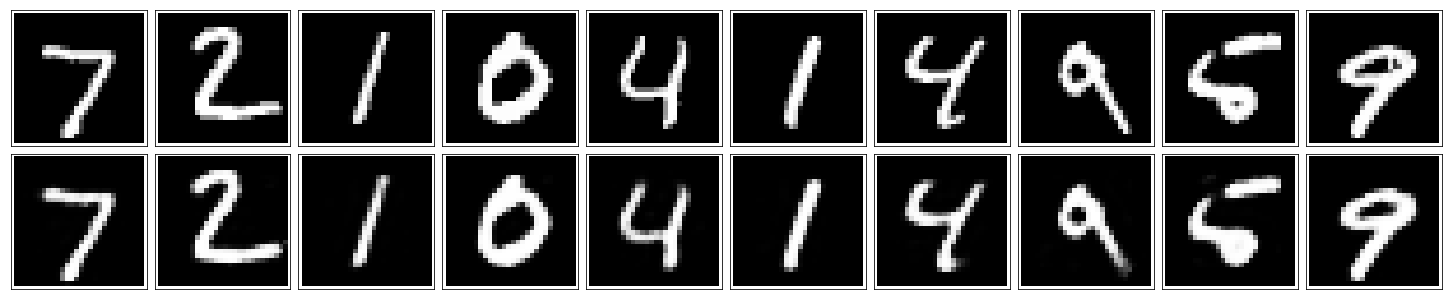

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [16]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.